# Compare Prompts

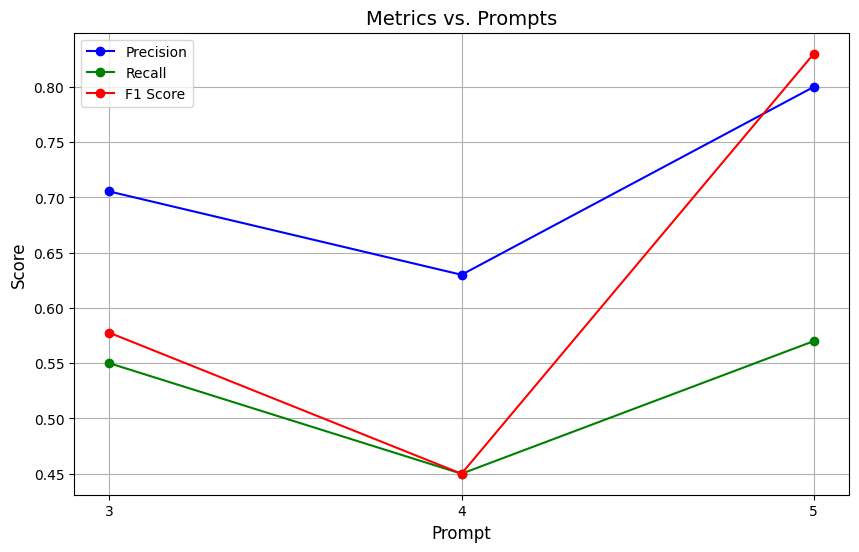

In [ ]:
import os
import json
import matplotlib.pyplot as plt

folder_path = "/home/fantoni/patent-sentence-classification/results/prompting"
file_names= [f for f in os.listdir(folder_path) if f.endswith('.json')]

# Store results for later plotting
results_all = {'prompt':[], 'precision': [], 'recall': [], 'f1': []}

for file_name in file_names:
    model = file_name.split('_')[0]
    prompt_number = file_name.split('_')[1].replace(".json", "")[-1]
    file_path = os.path.join(folder_path, file_name)

    results_all['prompt'].append(int(prompt_number))
    with open(file_path, 'r') as file:
        data = json.load(file)  # Parse the JSON data
        results_all['precision'].append(data['precision'])
        results_all['recall'].append(data['recall'])
        results_all['f1'].append(data['f1'])

# Plotting the metrics against prompt numbers
fig, axs = plt.subplots(figsize=(10, 6))

# Plot each metric as a line
plt.plot(results_all['prompt'], results_all['precision'], label='Precision', marker='o', linestyle='-', color='b')
plt.plot(results_all['prompt'], results_all['recall'], label='Recall', marker='o', linestyle='-', color='g')
plt.plot(results_all['prompt'], results_all['f1'], label='F1 Score', marker='o', linestyle='-', color='r')

# Set x-ticks to correspond to the prompt numbers
axs.set_xticks(results_all['prompt'])

axs.set_xlabel('Prompt', fontsize=12)
axs.set_ylabel('Score', fontsize=12)
axs.set_title('Metrics vs. Prompts', fontsize=14)
axs.legend()
axs.grid(True)
plt.show()